In [169]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot

In [190]:
base = pd.read_csv('dataset_SCL.csv')
base.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3128\3935152703.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  base = pd.read_csv('dataset_SCL.csv')


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1.0,1.0,2017.0,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2.0,1.0,2017.0,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3.0,1.0,2017.0,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4.0,1.0,2017.0,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5.0,1.0,2017.0,Jueves,I,American Airlines,Santiago,Miami


Analisis Exploratorio 

Se procede a realizar un analisis exploratorio con el fin de enter la distribucion de cada una de las variables de la base

In [112]:
base.shape

(68206, 18)

In [113]:
anno=pd.DataFrame({'count' : base.groupby("AÑO").size()}).reset_index()
anno.head()


,AÑO,count
0,2017.0,68165
1,2018.0,2


Para el año 2017 se realizaron un total de 68.165 vuelos y solo para el año 2018 se realizaron 2 vuelos

In [114]:
anno_mes=base.groupby(['AÑO', 'MES']).size()
anno_mes=anno_mes.reset_index()
anno_mes=pd.pivot_table(anno_mes, columns="AÑO", index="MES", values=0)
anno_mes 

AÑO,2017.0,2018.0
MES,,
1.0,6106.0,2.0
2.0,5561.0,NaN
3.0,5480.0,NaN
4.0,5020.0,NaN
5.0,5240.0,NaN
6.0,4981.0,NaN
7.0,5992.0,NaN
8.0,5743.0,NaN
9.0,5610.0,NaN


In [101]:
6344/68167

0.09306555958161573

Text(0, 0.5, 'Cantidad de vuelos')

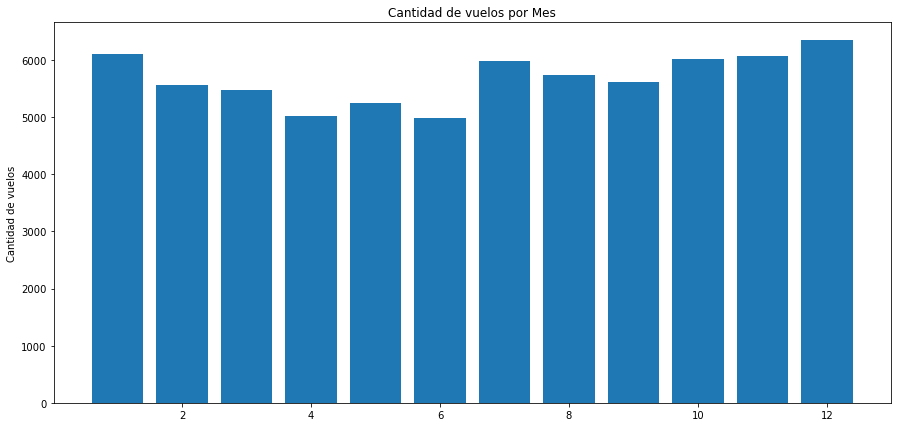

In [115]:
mes=pd.DataFrame({'count' : base.groupby("MES").size()}).reset_index()
pyplot.figure(figsize=(15,7))
pyplot.title("Cantidad de vuelos por Mes")
pyplot.bar(mes["MES"], height=mes["count"])
pyplot.ylabel("Cantidad de vuelos")

Como podemos observar aproximadamente se realizan minimo 5 mil vuelos en cada uno de los meses del año 2017 y solo se realizaron dos vuelos en el mes de enero de 2018. El mes donde se presentan mas vuelos es en Diciembre (9.3%) esto puede ser causado por la temporada vacional del ultimo año por sus festividades. Este leve incremento de vuelos en los ultimos meses del año de 2017 puede ser causado por la temporada de fin de año.

In [116]:
dia_semana=base.groupby('DIANOM').size()
dia_semana

DIANOM
Domingo       9796
Jueves       10237
Lunes        10130
Martes        9652
Miercoles     9721
Sabado        8352
Viernes      10279
dtype: int64

Text(0, 0.5, 'Cantidad de vuelos')

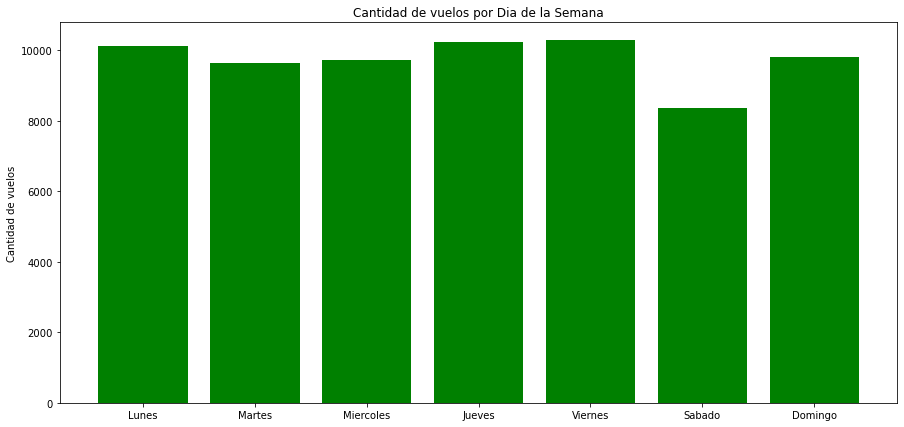

In [117]:
dia = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]
valores= [10130,9652,9721,10237,10279,8352,9796]
pyplot.figure(figsize=(15,7))
pyplot.title("Cantidad de vuelos por Dia de la Semana")
pyplot.bar(dia, height=valores, color="green")
pyplot.ylabel("Cantidad de vuelos")

Se puede observar que los dias donde se presentan la mayor cantidad de vuelos son los dias jueves, viernes y lunes, este comportamiento puede ser causado por los dias de descanso del fin de semana.

In [118]:
ciudad_origen=base.groupby('SIGLAORI').size()
ciudad_origen

SIGLAORI
Santiago    68167
dtype: int64

Todos los vuelos tienen como ciudad de origen Santiago

In [119]:
ciudad_destino=base.groupby('SIGLADES').size().sort_values(ascending=False)
ciudad_destino

SIGLADES
Buenos Aires        6335
Antofagasta         5786
Lima                5270
Calama              5146
Puerto Montt        4357
Concepcion          3993
Iquique             3747
Sao Paulo           3569
Temuco              2589
Arica               2436
La Serena           2410
Punta Arenas        2105
Ciudad de Panama    1850
Copiapo             1780
Mendoza             1625
Bogota              1604
Rio de Janeiro      1435
Montevideo          1066
Cordoba             1023
Miami               1016
Madrid               894
Balmaceda            839
Valdivia             753
Ciudad de Mexico     700
Isla de Pascua       452
Guayaquil            422
Nueva York           382
Auckland N.Z.        361
Paris                359
Atlanta              358
Dallas               357
Houston              334
Toronto              283
Roma                 259
Osorno               259
Castro (Chiloe)      235
Asuncion             232
La Paz               209
Londres              205
Sydney          

In [120]:
((6335+5786+5270+5146)/68167)*100

33.0614520222395

Text(0, 0.5, 'Cantidad de vuelos')

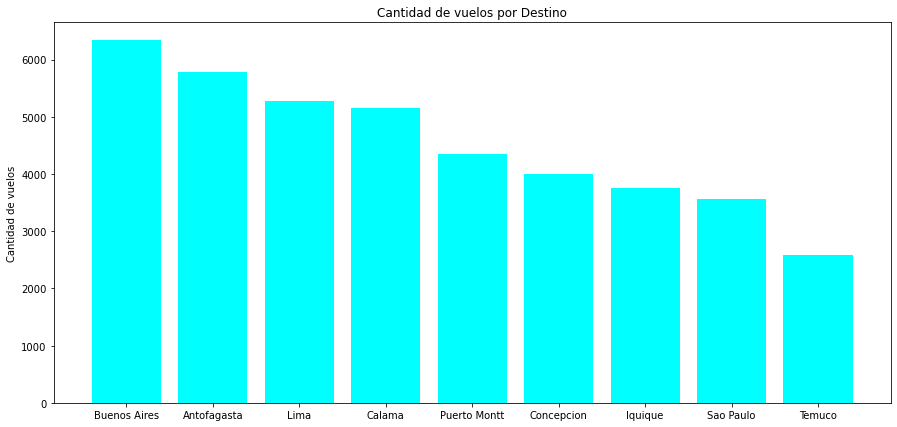

In [121]:
             
destino = ["Buenos Aires", "Antofagasta", "Lima", "Calama", "Puerto Montt", "Concepcion", "Iquique", "Sao Paulo", "Temuco"]
valores= [6335,5786,5270,5146,4357,3993,3747,3569,2589]
pyplot.figure(figsize=(15,7))
pyplot.title("Cantidad de vuelos por Destino")
pyplot.bar(destino, height=valores, color="cyan")
pyplot.ylabel("Cantidad de vuelos")


Se osberva que la mayor cantidad de vuelos tienen como destino Buenos Aires, Antofagasta, Lima y Calama (33% del total de los vuelos corresponde a estas 4 ciudades de destino).

Segun el siguiente comunicado de prensa de Latam "https://www.latamairlines.com/co/es/prensa/comunicados/aumento-frecuencias-latam-argentina".

El grupo LATAM tiene el agrado de anunciar que, con el objetivo de continuar fortaleciendo sus itinerarios, aumentará su oferta internacional desde y hacia Argentina durante los meses de julio, agosto y septiembre.

 “Con este incremento, contribuimos con la conectividad desde y hacia Argentina, promoviendo el turismo y el desarrollo del país. Nos enorgullece conectar a los argentinos con el mundo, con más de 120 destinos a través de nuestros 3 centros de conexión en Lima, Sao Paulo y Santiago de Chile”, comentó Javier Macias, Gerente Comercial de LATAM Airlines. “Como grupo de aerolíneas, estamos comprometidos a ofrecer a nuestros pasajeros una conectividad inigualable hacía, desde y dentro de Latinoamérica, así como la oportunidad de visitar los imponentes destinos que tanto Argentina como el continente tienen para ofrecer”, agregó Macias.

Con esto podria concluir que alguna de las estrategias de los años anteriores tuvieron el mismo enfoque de incrementar la frecuencia de vuelos hacia Buenos aires, Lima y Sao Pablo con el fin de promover el turismo.

Con respecto a la ciudad de Antofagasta como es un sitio turisco conocido como "La Perla del Norte" puede que sea un sitio preferido para los turistas.

In [122]:
aerolinea=base.groupby('OPERA').size().sort_values(ascending=False)
aerolinea

OPERA
Grupo LATAM                 40854
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        278
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
dtype: int64

In [48]:
print(40854/68167)
print(14298/68167)

0.5993222527029207
0.20974958557659865


Text(0, 0.5, 'Cantidad de vuelos')

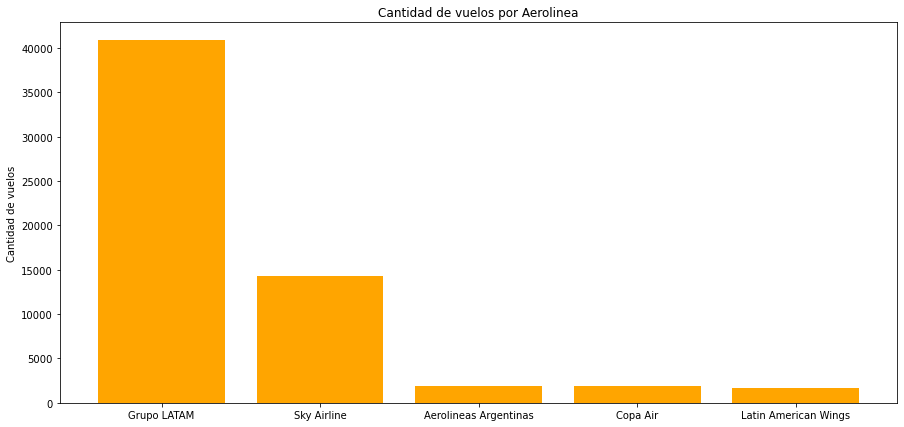

In [123]:
aero = ["Grupo LATAM", "Sky Airline", "Aerolineas Argentinas", "Copa Air", "Latin American Wings"]
valores= [40854, 14298, 1949, 1850, 1673]
pyplot.figure(figsize=(15,7))
pyplot.title("Cantidad de vuelos por Aerolinea")
pyplot.bar(aero, height=valores, color="orange")
pyplot.ylabel("Cantidad de vuelos")

se observa que la aerolinea con mas vuelos es el Grupo LATAM con un 59.9% del total de los vuelos y la aerolinea Sky Airline tiene un 20.9% del total de los vuelos. 

Este comportamiento es por que LATAM es la aerolinea chilena mas famosa de Chile ya que posee una cuota de mercado del 63%  de los pasajeros que viajan por Chile. Con respecto a SKY Airline es una aerolinea low cost la cual da resultados positivos y por eso esta como la segunda arelonia mas frecuente en la cantidad de vuelos den 2017.


In [124]:
TIPOVUELO=base.groupby('TIPOVUELO').size().sort_values()
TIPOVUELO

TIPOVUELO
I    31201
N    36966
dtype: int64

In [45]:
36966/68167

0.5422858567928763

Text(0, 0.5, 'Cantidad de vuelos')

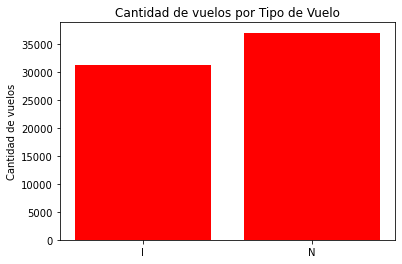

In [125]:
tipo=pd.DataFrame({'count' : base.groupby("TIPOVUELO").size()}).reset_index()
pyplot.title("Cantidad de vuelos por Tipo de Vuelo")
pyplot.bar(tipo["TIPOVUELO"], height=tipo["count"], color="red")
pyplot.ylabel("Cantidad de vuelos")

Vemos que el 54.2% de los vuelos son Nacionales y el 45.8% son vuelos internacionales, este comportamiento puede ser por que los tiquetes de vuelos nacionales son mas baratos que los tiquetes nacionales y por esta razon los pasajeros tienen a realizar mas viajes nacionales que internacionales.

In [126]:
DIA=base.groupby('DIA').size()
DIA

DIA
1.0     2207
2.0     2222
3.0     2269
4.0     2215
5.0     2239
6.0     2273
7.0     2263
8.0     2211
9.0     2226
10.0    2281
11.0    2237
12.0    2281
13.0    2271
14.0    2219
15.0    2238
16.0    2267
17.0    2226
18.0    2160
19.0    2238
20.0    2289
21.0    2265
22.0    2271
23.0    2259
24.0    2230
25.0    2179
26.0    2265
27.0    2285
28.0    2230
29.0    2043
30.0    2019
31.0    1289
dtype: int64

<BarContainer object of 31 artists>

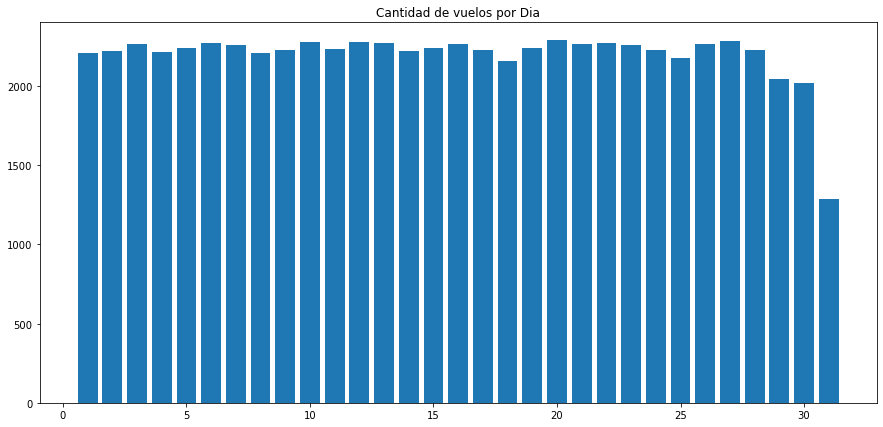

In [127]:
dia=pd.DataFrame({'count' : base.groupby("DIA").size()}).reset_index()
pyplot.figure(figsize=(15,7))
pyplot.title("Cantidad de vuelos por Dia")
pyplot.bar(dia["DIA"], height=dia["count"])

Observamos que en todos los dias del mes se realizan minimo 2 mil vuelos y no se presentan valores atipicos en este comportamiento

Creacion Nuevas Variables

A contunuacion se proceden a crear las variables solicitadas

In [128]:
base.dtypes

Fecha-I       object
Vlo-I         object
Ori-I         object
Des-I         object
Emp-I         object
Fecha-O       object
Vlo-O         object
Ori-O         object
Des-O         object
Emp-O         object
DIA          float64
MES          float64
AÑO          float64
DIANOM        object
TIPOVUELO     object
OPERA         object
SIGLAORI      object
SIGLADES      object
dtype: object

Se procede a realizar un ajuste en la variable Fecha-I ya que presenta problemas de lectura

In [191]:
base.dropna(inplace = True)
base["Fecha-I"]= base["Fecha-I"].str.split(",",  expand = True)

In [192]:
base["Fecha-I"]= pd.to_datetime(base["Fecha-I"], format='%Y-%m-%d %H:%M')
base["Fecha-O"]= pd.to_datetime(base["Fecha-O"], format='%Y-%m-%d %H:%M')

Creacion Variable dif_min y atraso_15

In [193]:

base["dif_min"]=(base["Fecha-O"]-base["Fecha-I"]).astype('timedelta64[m]')
base["atraso_15"] = pd.Series(np.where((base['dif_min'] >= 15) , 1, 0))


Creacion Variable Temporada Alta

In [194]:
base["temporada_alta"] =  pd.Series(np.where((base['Fecha-I'] >= "2017-12-15") & (base['Fecha-I'] <= "2017-03-03") |\
                                             (base['Fecha-I'] >= "2017-07-15") & (base['Fecha-I'] <= "2017-07-31") |\
                                             (base['Fecha-I'] >= "2017-09-11") & (base['Fecha-I'] <= "2017-09-30"), 1, 0))

Creacion Variable Periodo dia

In [195]:
base["periodo_dia"] = pd.Series(np.where((base["Fecha-I"].dt.hour.astype(int) >= 5) &  (base["Fecha-I"].dt.hour.astype(int) < 12), "mañana",
                                np.where((base["Fecha-I"].dt.hour.astype(int) >= 12) & (base["Fecha-I"].dt.hour.astype(int) < 19), "tarde","noche")))

In [71]:
# SE exporta la base de datos con las nuevas variables
base.to_csv("synthetic_features.csv", index=False)

Analisis tasa de atraso con variables 

Atraso Vs Destino

In [134]:
atraso_destino=base.groupby(['atraso_15', 'SIGLADES']).size()
atraso_destino=atraso_destino.reset_index()
atraso_destino=pd.pivot_table(atraso_destino, columns="atraso_15", index="SIGLADES", values=0).sort_values(by=0,ascending=False)
atraso_destino 

atraso_15,0.0,1.0
SIGLADES,,
Antofagasta,4852.0,934.0
Buenos Aires,4575.0,1760.0
Calama,4456.0,690.0
Lima,3982.0,1281.0
Puerto Montt,3542.0,815.0
Concepcion,3330.0,663.0
Iquique,3055.0,692.0
Sao Paulo,2598.0,971.0
Temuco,2119.0,448.0


In [135]:
#Filtro Destinos mas representativos
values=["Antofagasta","Buenos Aires","Calama","Lima","Puerto Montt","Concepcion","Iquique","Sao Paulo","Temuco","Arica"]
filtro=base[base.SIGLADES.isin(values)]
filtro.pivot_table(index = "SIGLADES", values = "atraso_15")


,atraso_15
SIGLADES,
Antofagasta,0.161424
Arica,0.151888
Buenos Aires,0.277822
Calama,0.134085
Concepcion,0.166041
Iquique,0.184681
Lima,0.243397
Puerto Montt,0.187055
Sao Paulo,0.272065


<BarContainer object of 10 artists>

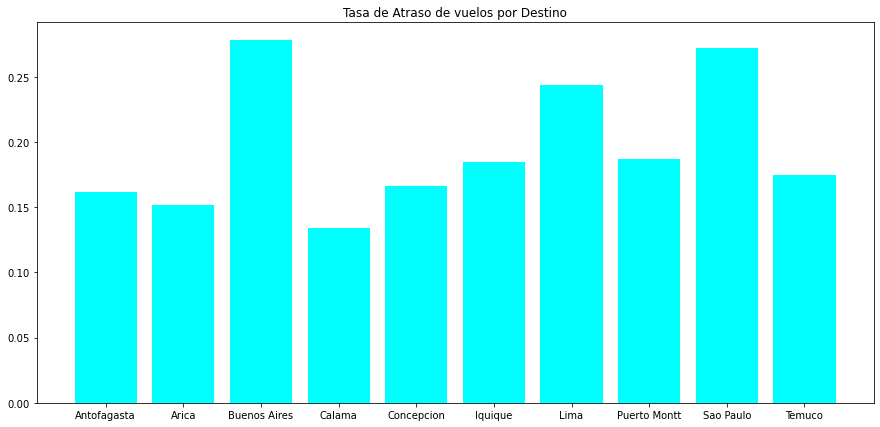

In [136]:
destino = ["Antofagasta", "Arica", "Buenos Aires", "Calama", "Concepcion","Iquique", "Lima", "Puerto Montt","Sao Paulo","Temuco"]
valores= [0.161424,0.151888,0.277822,0.134085,0.166041,0.184681,0.243397,0.187055,0.272065,0.174523]
pyplot.figure(figsize=(15,7))
pyplot.title("Tasa de Atraso de vuelos por Destino")
pyplot.bar(destino, height=valores, color="cyan")


Se puede concluir que la tasa de retraso de los vuelos es mas alta en ciudades fuera de chile, esto puede ser por que los protocolos y/o requisitos de seguridad para los vuelos internacionales pueden ser mas rigurosos que los vuelos nacionales y por esta razon pueden demorarsen un poco mas. 

Atraso Vs Aerolinea

In [137]:
atraso_aeroli=base.groupby(['atraso_15', 'OPERA']).size()
atraso_aeroli=atraso_aeroli.reset_index()
atraso_aeroli=pd.pivot_table(atraso_aeroli, columns="atraso_15", index="OPERA", values=0).sort_values(by=0,ascending=False)
atraso_aeroli 

atraso_15,0.0,1.0
OPERA,,
Grupo LATAM,32883,7971
Sky Airline,11570,2728
Copa Air,1724,126
Aerolineas Argentinas,1437,512
Latin American Wings,995,678
JetSmart SPA,857,198
Avianca,835,317
American Airlines,664,93
Gol Trans,494,312


In [138]:
#Filtro Destinos mas representativos
values=["Grupo LATAM","Sky Airline", "Copa Air", "Aerolineas Argentinas", "Latin American Wings", "JetSmart SPA"]
filtro=base[base.OPERA.isin(values)]
filtro.pivot_table(index = "OPERA", values = "atraso_15")

,atraso_15
OPERA,
Aerolineas Argentinas,0.262699
Copa Air,0.068108
Grupo LATAM,0.195109
JetSmart SPA,0.187678
Latin American Wings,0.405260
Sky Airline,0.190796


<BarContainer object of 6 artists>

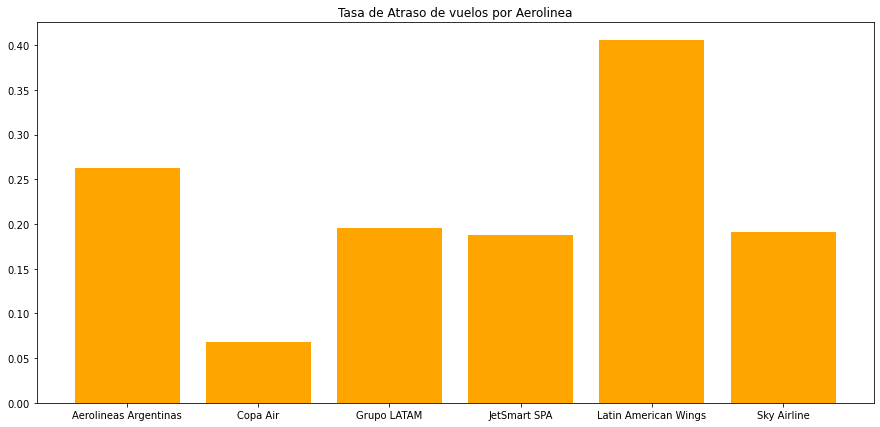

In [139]:
aero = ["Aerolineas Argentinas", "Copa Air", "Grupo LATAM", "JetSmart SPA", "Latin American Wings","Sky Airline"]
valores= [0.262699,0.068108,0.195109,0.187678,0.405260,0.190796]
pyplot.figure(figsize=(15,7))
pyplot.title("Tasa de Atraso de vuelos por Aerolinea")
pyplot.bar(aero, height=valores, color="orange")

Una de las principales razones del porque Latin American Wings tiene una tasa alta de atraso en sus vuelos es debido por ser una aerolionea relativamente joven ya que sus operaciones se iniciaron en 2016, tambien por estar bajo acusaciones por la antiguedad de sus aviones y falta de mantenimiento en sus equipos y esto puede afectar en el cumplimiento de la puntualidad del despegue de sus aviones.



Atraso Vs Mes

In [140]:
base.pivot_table(index = "MES", values = "atraso_15")

,atraso_15
MES,
1.0,0.176682
2.0,0.161482
3.0,0.124270
4.0,0.129482
5.0,0.171183
6.0,0.185706
7.0,0.312917
8.0,0.187010
9.0,0.186809


<BarContainer object of 12 artists>

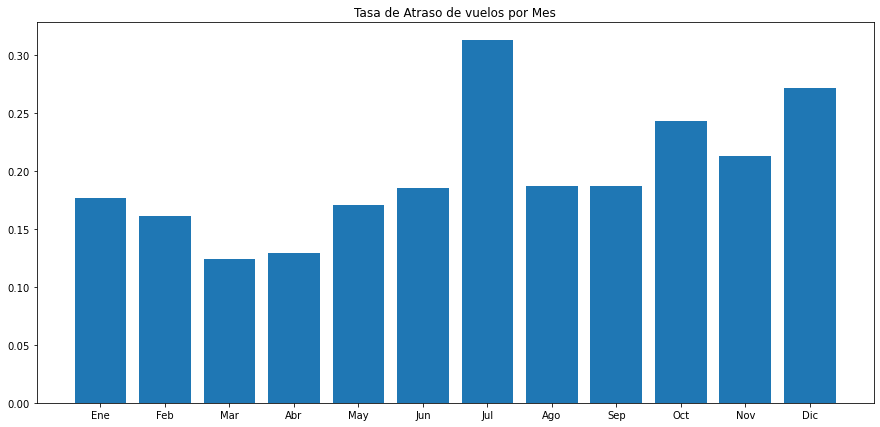

In [141]:

mes = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
valores= [0.176682, 0.161482, 0.124270, 0.129482, 0.171183, 0.185706,0.312917,0.187010,0.186809,0.243023,0.212920, 0.271891]
pyplot.figure(figsize=(15,7))
pyplot.title("Tasa de Atraso de vuelos por Mes")
pyplot.bar(mes, height=valores)

segun el siguiente articulo https://www.notimerica.com/sociedad/noticia-invierno-llegado-alerta-climatologica-chile-20170714185144.html

Se decreto una alerta preventiva en mas del 90% de la region por chile por lluvias, nevadas, vientos y marejadas en el mes de Julio por esta razon podemos concluir que la tasa de atraso de los vuelos es mas alta en este mes comparada con los demas meses. 

Atraso Vs Dia semana

In [142]:
base.pivot_table(index = "DIANOM", values = "atraso_15")

,atraso_15
DIANOM,
Domingo,0.200838
Jueves,0.196559
Lunes,0.201778
Martes,0.196601
Miercoles,0.188349
Sabado,0.215141
Viernes,0.199942


<BarContainer object of 7 artists>

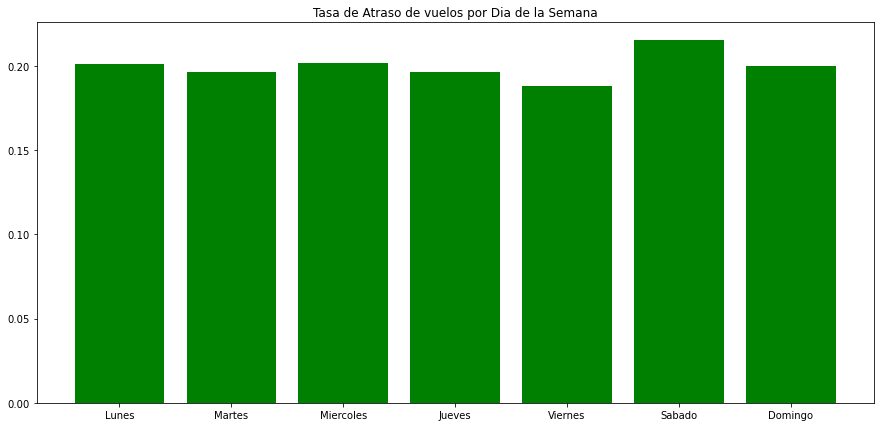

In [143]:
dia = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]
valores= [0.200838, 0.196559, 0.201778, 0.196601, 0.188349, 0.215141, 0.199942]
pyplot.figure(figsize=(15,7))
pyplot.title("Tasa de Atraso de vuelos por Dia de la Semana")
pyplot.bar(dia, height=valores, color="green")

Se puede concluir que no existe una diferencia significativa en la tasa de atrasos de vuelos en los dias de la semana los cuales estan alrededor el 20%.

Atraso Vs Temporada

In [144]:
atraso_tempo=base.groupby(['atraso_15', 'temporada_alta']).size()
atraso_tempo=atraso_tempo.reset_index()
atraso_tempo=pd.pivot_table(atraso_tempo, columns="atraso_15", index="temporada_alta", values=0).sort_values(by=0,ascending=False)
atraso_tempo 

atraso_15,0.0,1.0
temporada_alta,,
0.0,49479,11961
1.0,5051,1635


In [145]:
base.pivot_table(index = "temporada_alta", values = "atraso_15")

,atraso_15
temporada_alta,
0.0,0.194678
1.0,0.244541


<BarContainer object of 2 artists>

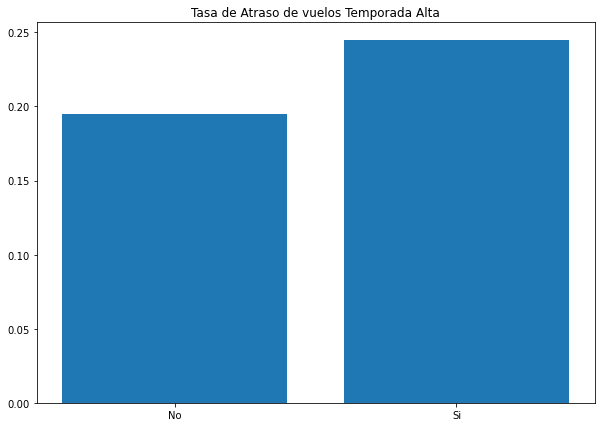

In [146]:
temp = ["No", "Si"]
valores= [0.194678, 0.244541]
pyplot.figure(figsize=(10,7))
pyplot.title("Tasa de Atraso de vuelos Temporada Alta")
pyplot.bar(temp, height=valores)

segun el siguiente articulo https://www.notimerica.com/sociedad/noticia-invierno-llegado-alerta-climatologica-chile-20170714185144.html

Se decreto una alerta preventiva en mas del 90% de la region por chile por lluvias, nevadas, vientos y marejadas en el mes de Julio por esta razon podemos concluir que la tasa de atraso de los vuelos es mas alta en temproada alta porque se tiene en cuenta los vuelos entre 15 de julio y 31 de Julio. 

Atraso Vs Tipo Vuelo

In [147]:
atraso_tipo=base.groupby(['atraso_15', 'TIPOVUELO']).size()
atraso_tipo=atraso_tipo.reset_index()
atraso_tipo=pd.pivot_table(atraso_tipo, columns="atraso_15", index="TIPOVUELO", values=0).sort_values(by=0,ascending=False)
atraso_tipo 

atraso_15,0.0,1.0
TIPOVUELO,,
N,30860,6072
I,23670,7524


In [148]:
base.pivot_table(index = "TIPOVUELO", values = "atraso_15")

,atraso_15
TIPOVUELO,
I,0.24120
N,0.16441


<BarContainer object of 2 artists>

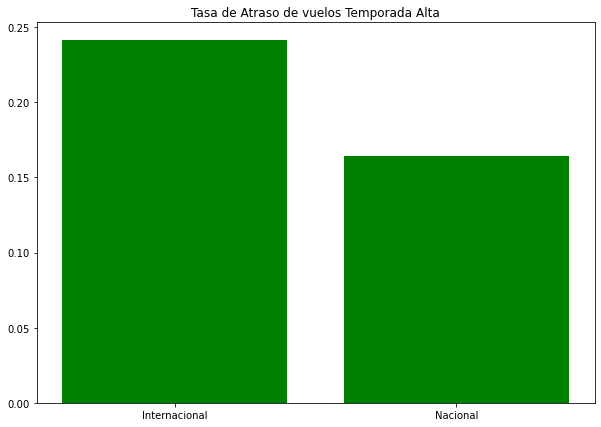

In [149]:
temp = ["Internacional", "Nacional"]
valores= [0.24120, 0.16441]
pyplot.figure(figsize=(10,7))
pyplot.title("Tasa de Atraso de vuelos Temporada Alta")
pyplot.bar(temp, height=valores, color="green")

Se puede concluir que la tasa de retraso de los vuelos es mas alta en vuelos internacionales, esto puede ser por que los protocolos y/o requisitos de seguridad para los vuelos internacionales pueden ser mas rigurosos que los vuelos nacionales y por esta razon pueden demorarsen un poco mas. 

Las posibles variables que mas pueden influenciar en predecir los atrasos seria los destinos, las aerolineas, el mes y el tipo de vuelo.

Recategorizacion de Variables 

Como muchas variables tienes demasiadas categorias se procede a realizar una recategorizacion con el fin de mejorar las metricas del modelo ya que las categorias con una participacion muy baja dentro dentro de la vaiable puede generar resultados negativos en los modelos predictivos

In [163]:
base.head(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,OPERA,SIGLAORI,SIGLADES,dif_min,atraso_15,temporada_alta,periodo_dia,Dia_Cat,OPERA_Cat,SIGLADES_Cat
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,3.0,0.0,0.0,noche,1-10,Otros,Otros
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,9.0,0.0,0.0,noche,1-10,Otros,Otros
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,9.0,0.0,0.0,noche,1-10,Otros,Otros
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,3.0,0.0,0.0,noche,1-10,Otros,Otros
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,-2.0,0.0,0.0,noche,1-10,Otros,Otros


In [196]:
#Recategorizacion de la variable dia en 3 categorias de 1 a 10 dias, entre 11 y 20 dias y mas de 21 dias 
base["Dia_Cat"] =  pd.Series(np.where((base['DIA'] >= 1) & (base['DIA'] <= 10),"1-10",
                              np.where((base['DIA'] >= 11) & (base['DIA'] <= 20),"11-20","Mas 21")))
                              

In [198]:
#Recategorizacion de la variable de la aerolinea, las de baja participacion quedan en la categoria Otros
base["OPERA_Cat"] =  pd.Series(np.where((base['OPERA'] == "Grupo LATAM") ,"Grupo LATAM",
                               np.where((base['OPERA'] == "Sky Airline"),"Sky Airline",
                               np.where((base['OPERA'] == "Aerolineas Argentinas"),"Aerolineas Argentinas",
                               np.where((base['OPERA'] == "Copa Air"),"Copa Air",
                               np.where((base['OPERA'] == "Latin American Wings"),"Latin American Wings","Otros_OPERA"))))))                            


In [199]:

#Recategorizacion de la variable de destino, destinos con una baja participacion quedan en la categoria otros
base["SIGLADES_Cat"] =  pd.Series(np.where((base['SIGLADES'] == "Buenos Aires") ,"Buenos Aires",
                               np.where((base['SIGLADES'] == "Antofagasta"),"Antofagasta",
                               np.where((base['SIGLADES'] == "Limas"),"Lima",
                               np.where((base['SIGLADES'] == "Calama"),"Calama",
                               np.where((base['SIGLADES'] == "Puerto Montt"),"Puerto Montt",
                               np.where((base['SIGLADES'] == "Concepcion"),"Concepcion",
                               np.where((base['SIGLADES'] == "Iquique"),"Iquique",
                               np.where((base['SIGLADES'] == "Sao Paulo"),"Sao Paulo",
                               np.where((base['SIGLADES'] == "Temuco"),"Temuco","Otros_SIGLADES"))))))))))                                
                               
                     

Dicotomizar Variables Categoricas

Para poder ingresar las variables a los modelos predictivos, una buena practica es convertir las varibables categoricas en dicotomicas.

In [200]:
base_2=base

In [201]:
dummy_1=pd.get_dummies(base_2["MES"])
base_3=pd.concat([base_2.iloc[:,],dummy_1],axis=1)

In [202]:
dummy_2=pd.get_dummies(base_3["DIANOM"])
base_4=pd.concat([base_3.iloc[:,],dummy_2],axis=1)
#base_4.head()

In [203]:
dummy_3=pd.get_dummies(base_4["TIPOVUELO"])
base_5=pd.concat([base_4.iloc[:,],dummy_3],axis=1)
#base_5.head()

In [204]:
dummy_4=pd.get_dummies(base_5["periodo_dia"])
base_6=pd.concat([base_5.iloc[:,],dummy_4],axis=1)

dummy_5=pd.get_dummies(base_6["Dia_Cat"])
base_7=pd.concat([base_6.iloc[:,],dummy_5],axis=1)

dummy_6=pd.get_dummies(base_7["OPERA_Cat"])
base_8=pd.concat([base_7.iloc[:,],dummy_6],axis=1)

dummy_7=pd.get_dummies(base_8["SIGLADES_Cat"])
base_9=pd.concat([base_8.iloc[:,],dummy_7],axis=1)

In [218]:
#Se seleccionan las variables dicotomicas
base_10=base_9.loc[:,['atraso_15',	'temporada_alta',	1.0,	2.0,	3.0,	4.0,	5.0,	6.0,	7.0,	8.0,	9.0,
	10.0,	11.0,	12.0,	'Domingo',	'Jueves',	'Lunes',	'Martes',	'Miercoles',	'Sabado',	'Viernes',	
    'I',	'N',	'mañana',	'noche',	'tarde',	'1-10',	'11-20',	'Mas 21',	'Aerolineas Argentinas',	
    'Copa Air',	'Grupo LATAM',	'Latin American Wings',	'Otros_OPERA',	'Sky Airline',	'Antofagasta',	'Buenos Aires',	
    'Calama',	'Concepcion',	'Iquique',	'Otros_SIGLADES',	'Puerto Montt',	'Sao Paulo',	'Temuco']]




Procesamiento datos para el modelo

Como la finalidad es crear un modelo que nos indique la probabilidad de atraso de un vuelo, se debe identificar de todas las variables disponibles cuales se van a ingresar al modelo, teniendo en cuenta que la variable respuesta es "Atraso_15" y el resto son las variables explicativas.

In [261]:
base_x=base_10.loc[:,['temporada_alta',	1.0,	2.0,	3.0,	4.0,	5.0,	6.0,	7.0,	8.0,	9.0,
	10.0,	11.0,	12.0,	'Domingo',	'Jueves',	'Lunes',	'Martes',	'Miercoles',	'Sabado',	'Viernes',	
    'I',	'N',	'mañana',	'noche',	'tarde',	'1-10',	'11-20',	'Mas 21',	'Aerolineas Argentinas',	
    'Copa Air',	'Grupo LATAM',	'Latin American Wings',	'Otros_OPERA',	'Sky Airline',	'Antofagasta',	'Buenos Aires',	
    'Calama',	'Concepcion',	'Iquique',	'Otros_SIGLADES',	'Puerto Montt',	'Sao Paulo',	'Temuco']]

base_y=base_10.loc[:,['atraso_15']]

In [262]:
base_x=base_x.fillna(0)
base_y=base_y.fillna(0)

In [263]:
np.isnan(base_x).any()
np.isnan(base_y).any()

np.isinf(base_x).any()
np.isinf(base_y).any()

atraso_15    False
dtype: bool

In [264]:
#Transformacion a float
base_x['temporada_alta']= base_x['temporada_alta'].astype(float)
base_x[1.0]= base_x[1.0].astype(float)
base_x[2.0]= base_x[2.0].astype(float)
base_x[3.0]= base_x[3.0].astype(float)
base_x[4.0]= base_x[4.0].astype(float)
base_x[5.0]= base_x[5.0].astype(float)
base_x[6.0]= base_x[6.0].astype(float)
base_x[7.0]= base_x[7.0].astype(float)
base_x[8.0]= base_x[8.0].astype(float)
base_x[9.0]= base_x[9.0].astype(float)
base_x[10.0]= base_x[10.0].astype(float)
base_x[11.0]= base_x[11.0].astype(float)
base_x[12.0]= base_x[12.0].astype(float)
base_x['Domingo']= base_x['Domingo'].astype(float)
base_x['Jueves']= base_x['Jueves'].astype(float)
base_x['Lunes']= base_x['Lunes'].astype(float)
base_x['Martes']= base_x['Martes'].astype(float)
base_x['Miercoles']= base_x['Miercoles'].astype(float)
base_x['Sabado']= base_x['Sabado'].astype(float)
base_x['Viernes']= base_x['Viernes'].astype(float)
base_x['I']= base_x['I'].astype(float)
base_x['N']= base_x['N'].astype(float)
base_x['mañana']= base_x['mañana'].astype(float)
base_x['noche']= base_x['noche'].astype(float)
base_x['tarde']= base_x['tarde'].astype(float)
base_x['1-10']= base_x['1-10'].astype(float)
base_x['11-20']= base_x['11-20'].astype(float)
base_x['Mas 21']= base_x['Mas 21'].astype(float)
base_x['Aerolineas Argentinas']= base_x['Aerolineas Argentinas'].astype(float)
base_x['Copa Air']= base_x['Copa Air'].astype(float)
base_x['Grupo LATAM']= base_x['Grupo LATAM'].astype(float)
base_x['Latin American Wings']= base_x['Latin American Wings'].astype(float)
base_x['Otros_OPERA']= base_x['Otros_OPERA'].astype(float)
base_x['Sky Airline']= base_x['Sky Airline'].astype(float)
base_x['Antofagasta']= base_x['Antofagasta'].astype(float)
base_x['Buenos Aires']= base_x['Buenos Aires'].astype(float)
base_x['Calama']= base_x['Calama'].astype(float)
base_x['Concepcion']= base_x['Concepcion'].astype(float)
base_x['Iquique']= base_x['Iquique'].astype(float)
base_x['Otros_SIGLADES']= base_x['Otros_SIGLADES'].astype(float)
base_x['Puerto Montt']= base_x['Puerto Montt'].astype(float)
base_x['Sao Paulo']= base_x['Sao Paulo'].astype(float)
base_x['Temuco']= base_x['Temuco'].astype(float)
base_y=base_y['atraso_15'].astype(float)


In [265]:
base_x=base_x.dropna(axis=1, how='all')

In [256]:
base_x.dtypes

temporada_alta           float64
1.0                      float64
2.0                      float64
3.0                      float64
4.0                      float64
5.0                      float64
6.0                      float64
7.0                      float64
8.0                      float64
9.0                      float64
10.0                     float64
11.0                     float64
12.0                     float64
Domingo                  float64
Jueves                   float64
Lunes                    float64
Martes                   float64
Miercoles                float64
Sabado                   float64
Viernes                  float64
I                        float64
N                        float64
mañana                   float64
noche                    float64
tarde                    float64
1-10                     float64
11-20                    float64
Mas 21                   float64
Aerolineas Argentinas    float64
Copa Air                 float64
Grupo LATA

Point Biserial Correlation

Este analsis consiste en calcular un coeficiente de correlacion cuando la variable Y es dicotomica. De esta forma podemos seleccionar las varibales que tenga un grado alto de asociacion con respecto a la variable respuesta y asi depurar la gran cantidad de variables explicativas que tenemos.

In [289]:
from scipy.stats import pointbiserialr
import seaborn as sns

In [267]:
PBC =[]
pval = []
target = base_y

for f in base_x.columns:
    feature = base_x[f]
    pbc=pointbiserialr(feature, target)
    PBC.append(pbc.correlation)
    pval.append(pbc.pvalue)


In [287]:
feature_rank= pd.DataFrame( { 'feature': base_x.columns, 'PBC':PBC})
feature_rank_1=feature_rank.loc[:,'PBC'] >=0.03
feature_rank_1_1=feature_rank.loc[feature_rank_1]
feature_rank_2=feature_rank.loc[:,'PBC'] <=-0.03 
feature_rank_2_2=feature_rank.loc[feature_rank_2]
feature_rank_f=pd.concat([feature_rank_1_1,feature_rank_2_2])
feature_rank_f=feature_rank_f.round(3)

In [288]:
feature_rank_f.head(50)

,feature,PBC
0,temporada_alta,0.037
7,7.0,0.088
10,10.0,0.034
12,12.0,0.057
20,I,0.096
24,tarde,0.030
31,Latin American Wings,0.087
35,Buenos Aires,0.061
41,Sao Paulo,0.039
3,3.0,-0.056


[Text(0, 0, '0.096'),
 Text(0, 0, '0.088'),
 Text(0, 0, '0.087'),
 Text(0, 0, '0.061'),
 Text(0, 0, '0.057'),
 Text(0, 0, '0.039'),
 Text(0, 0, '0.037'),
 Text(0, 0, '0.034'),
 Text(0, 0, '0.03'),
 Text(0, 0, '-0.033'),
 Text(0, 0, '-0.048'),
 Text(0, 0, '-0.049'),
 Text(0, 0, '-0.049'),
 Text(0, 0, '-0.055'),
 Text(0, 0, '-0.056'),
 Text(0, 0, '-0.096')]

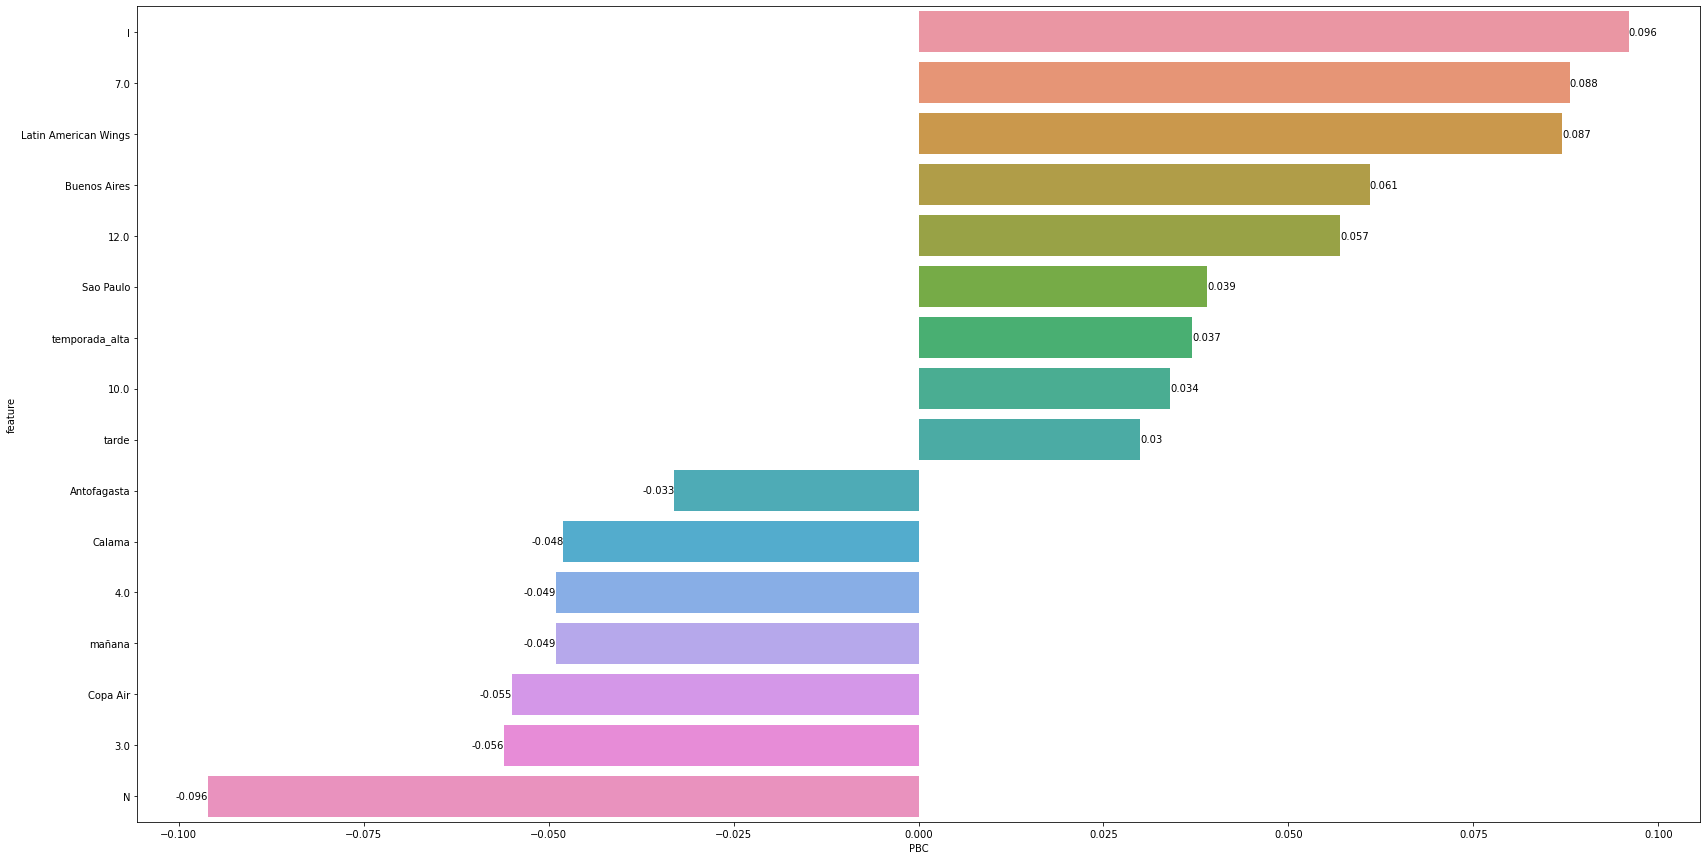

In [291]:
feature_rank= feature_rank_f.sort_values('PBC', ascending=False)
pyplot.figure(figsize=(28,15))
ax=sns.barplot( y= 'feature', x= 'PBC',data=feature_rank)
ax.bar_label(ax.containers[0])

Gracias a este analisis podemos seleccionar un total de 16 variables que nos aportarian en la construccion del modelo predictivo.

Modelo Supervisado 

In [512]:
base_10.groupby('atraso_15').size()


atraso_15
0.0    54530
1.0    13596
dtype: int64

Como se quiere calcular la probabilidad de atraso de un vuelo y se tiene la variable "atraso_15" y esta es una variable dicotomica, se procede a construir un modelo supervisado de clasificacion donde su variable respuesta es dicotomica (1 = atraso vuelo, 0= sin atraso). La distribucion del atraso del vuelo es un 20% de atrasos de vuelos contra un 80% de no atrasos de vuelos. 

Se van a cosntruir diferentes modelos de Randomforest y XGBoot para encontrar el mejor modelo.

Primer Modelo Randomforest 

para la contruccion de este modelo se va tomar el modelo randomforest sin parametros y con su distribucion natural de atrasos de vuelos (20%-80%)

In [316]:
!pip install xgboost

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score,recall_score, precision_score, auc, f1_score

In [302]:
X=base_x.loc[:,["temporada_alta", 7.0, 10.0, 12.0,"I","tarde","Latin American Wings","Buenos Aires","Sao Paulo",3.0,4.0,"N",
                "mañana","Copa Air","Antofagasta","Calama"]]
y=base_y

#base de entrenamiento del 70% y de validacion del 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [303]:
clf1=RandomForestClassifier()
clf1.fit(X_train,y_train)

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier()

In [304]:
train_pred = clf1.predict(X_train)
test_pred = clf1.predict(X_test)

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


Sin entrenar: ROC AUC=0.500
Random Forest: ROC AUC=0.651


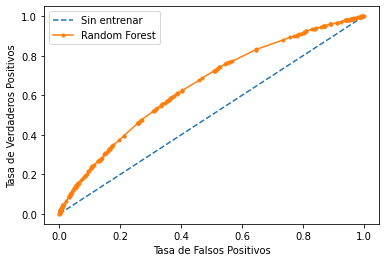

In [305]:
ns_probs= [0 for _ in range(len(y_test))]
lr_probs1=clf1.predict_proba(X_test)
lr_probs=lr_probs1[:, 1]


ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

La primera metrica que identicamos es el ROC AUC del 0.651

In [308]:
def evaluate_model(act, pred):
    print("Matrix Confusion \n", confusion_matrix(act,pred))
    print("Accuracy :", accuracy_score(act,pred))
    print("Recall :", recall_score(act,pred))
    print("Precision :", precision_score(act,pred))
    print("F1 Score :", f1_score(act,pred))
    

se procede a calcular las demas metricas del modelo 

In [310]:
print("--Train--")
evaluate_model(y_train,train_pred)
print("--Test--")
evaluate_model(y_test,test_pred)

--Train--
Matrix Confusion 
 [[38007   226]
 [ 9137   346]]
Accuracy : 0.8037765110235561
Recall : 0.03648634398397132
Precision : 0.6048951048951049
F1 Score : 0.06882148184982596
--Test--
Matrix Confusion 
 [[16226   111]
 [ 3992   121]]
Accuracy : 0.7993643031784841
Recall : 0.029418915633357648
Precision : 0.521551724137931
F1 Score : 0.05569620253164557


Segundo Modelo XGBoost

para la contruccion de este modelo se va tomar el modelo XGBoost sin parametros y con su distribucion natural de atrasos de vuelos (20%-80%)

In [318]:
clf2=XGBClassifier()
clf2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [319]:
train_pred = clf2.predict(X_train)
test_pred = clf2.predict(X_test)

Sin entrenar: ROC AUC=0.500
XGBClasifier: ROC AUC=0.652


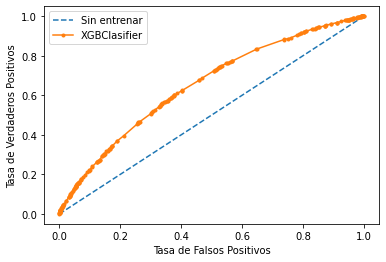

In [320]:
ns_probs= [0 for _ in range(len(y_test))]
lr_probs1=clf2.predict_proba(X_test)
lr_probs=lr_probs1[:, 1]


ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('XGBClasifier: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBClasifier')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

In [322]:
print("--Train--")
evaluate_model(y_train,train_pred)
print("--Test--")
evaluate_model(y_test,test_pred)

--Train--
Matrix Confusion 
 [[38132   101]
 [ 9266   217]]
Accuracy : 0.8036926817000587
Recall : 0.022883053885901086
Precision : 0.6823899371069182
F1 Score : 0.04428119579634731
--Test--
Matrix Confusion 
 [[16285    52]
 [ 4039    74]]
Accuracy : 0.7999511002444988
Recall : 0.01799173352783856
Precision : 0.5873015873015873
F1 Score : 0.03491389478650625


Tercer Modelo

para la contruccion de este modelo se va tomar el modelo randomforest sin parametros y se realiza un balanceo en la distribucion de la variable de atrasos en la base de entrenamiento para que quede 50%-50% y para la base de validacion se propone hacer un cambio en la distribucion de la variable respuesta de 70%-30%

In [478]:
base_11=base_10.fillna(0)
np.isnan(base_11).any()
np.isinf(base_11).any()


atraso_15                False
temporada_alta           False
1.0                      False
2.0                      False
3.0                      False
4.0                      False
5.0                      False
6.0                      False
7.0                      False
8.0                      False
9.0                      False
10.0                     False
11.0                     False
12.0                     False
Domingo                  False
Jueves                   False
Lunes                    False
Martes                   False
Miercoles                False
Sabado                   False
Viernes                  False
I                        False
N                        False
mañana                   False
noche                    False
tarde                    False
1-10                     False
11-20                    False
Mas 21                   False
Aerolineas Argentinas    False
Copa Air                 False
Grupo LATAM              False
Latin Am

In [479]:
base_11['temporada_alta']= base_11['temporada_alta'].astype(float)
base_11[1.0]= base_11[1.0].astype(float)
base_11[2.0]= base_11[2.0].astype(float)
base_11[3.0]= base_11[3.0].astype(float)
base_11[4.0]= base_11[4.0].astype(float)
base_11[5.0]= base_11[5.0].astype(float)
base_11[6.0]= base_11[6.0].astype(float)
base_11[7.0]= base_11[7.0].astype(float)
base_11[8.0]= base_11[8.0].astype(float)
base_11[9.0]= base_11[9.0].astype(float)
base_11[10.0]= base_11[10.0].astype(float)
base_11[11.0]= base_11[11.0].astype(float)
base_11[12.0]= base_11[12.0].astype(float)
base_11['Domingo']= base_11['Domingo'].astype(float)
base_11['Jueves']= base_11['Jueves'].astype(float)
base_11['Lunes']= base_11['Lunes'].astype(float)
base_11['Martes']= base_11['Martes'].astype(float)
base_11['Miercoles']= base_11['Miercoles'].astype(float)
base_11['Sabado']= base_11['Sabado'].astype(float)
base_11['Viernes']= base_11['Viernes'].astype(float)
base_11['I']= base_11['I'].astype(float)
base_11['N']= base_11['N'].astype(float)
base_11['mañana']= base_11['mañana'].astype(float)
base_11['noche']= base_11['noche'].astype(float)
base_11['tarde']= base_11['tarde'].astype(float)
base_11['1-10']= base_11['1-10'].astype(float)
base_11['11-20']= base_11['11-20'].astype(float)
base_11['Mas 21']= base_11['Mas 21'].astype(float)
base_11['Aerolineas Argentinas']= base_11['Aerolineas Argentinas'].astype(float)
base_11['Copa Air']= base_11['Copa Air'].astype(float)
base_11['Grupo LATAM']= base_11['Grupo LATAM'].astype(float)
base_11['Latin American Wings']= base_11['Latin American Wings'].astype(float)
base_11['Otros_OPERA']= base_11['Otros_OPERA'].astype(float)
base_11['Sky Airline']= base_11['Sky Airline'].astype(float)
base_11['Antofagasta']= base_11['Antofagasta'].astype(float)
base_11['Buenos Aires']= base_11['Buenos Aires'].astype(float)
base_11['Calama']= base_11['Calama'].astype(float)
base_11['Concepcion']= base_11['Concepcion'].astype(float)
base_11['Iquique']= base_11['Iquique'].astype(float)
base_11['Otros_SIGLADES']= base_11['Otros_SIGLADES'].astype(float)
base_11['Puerto Montt']= base_11['Puerto Montt'].astype(float)
base_11['Sao Paulo']= base_11['Sao Paulo'].astype(float)
base_11['Temuco']= base_11['Temuco'].astype(float)
base_11['atraso_15'].astype(float)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
68201    0.0
68202    0.0
68203    0.0
68204    0.0
68205    0.0
Name: atraso_15, Length: 68166, dtype: float64

In [480]:
p_train= 0.7

base_11['is_train']=np.random.uniform(0,1, len(base_11)) <= p_train
train, test = base_11[base_11['is_train']==True], base_11[base_11['is_train']==False]
base_11= base_11.drop('is_train',1)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3128\4201326791.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  base_11= base_11.drop('is_train',1)


In [481]:
print(test.shape)
print(train.shape)

(20558, 45)
(47608, 45)


In [482]:
train_y_1 = train.loc[:,'atraso_15']==1
train_y_1_1= train.loc[train_y_1]
train_y_0= train.loc[:,'atraso_15']==0
train_y_0_0= train.loc[train_y_0]

In [483]:
print(train_y_1_1.shape)
print(train_y_0_0.shape)

(9522, 45)
(38086, 45)


In [484]:
train_y_0_0_sample=train_y_0_0.sample(n=9522)

In [485]:
train= pd.concat([train_y_0_0_sample,train_y_1_1])
train.shape

(19044, 45)

In [486]:
test_y_1 = test.loc[:,'atraso_15']==1
test_y_1_1= test.loc[test_y_1]
test_y_0= test.loc[:,'atraso_15']==0
test_y_0_0= test.loc[test_y_0]

In [487]:
print(test_y_1_1.shape)
print(test_y_0_0.shape)

(4074, 45)
(16484, 45)


In [488]:
test_y_0_0_sample=test_y_0_0.sample(n=9066)

In [489]:
test= pd.concat([test_y_0_0_sample,test_y_1_1])
test.shape

(13140, 45)

ya con el balanceo de la variable respuesta en las bases, se construye el modelo

In [490]:
X_train=train.loc[:,["temporada_alta", 7.0, 10.0, 12.0,"I","tarde","Latin American Wings","Buenos Aires","Sao Paulo",3.0,4.0,"N",
                "mañana","Copa Air","Antofagasta","Calama"]]
X_test=test.loc[:,["temporada_alta", 7.0, 10.0, 12.0,"I","tarde","Latin American Wings","Buenos Aires","Sao Paulo",3.0,4.0,"N",
                "mañana","Copa Air","Antofagasta","Calama"]]
y_train=train.loc[:,["atraso_15"]]
y_test=test.loc[:,["atraso_15"]]


In [491]:
X_train=np.nan_to_num(X_train.astype(np.float32))
X_test=np.nan_to_num(X_test.astype(np.float32))

In [492]:
clf3=RandomForestClassifier()
clf3.fit(X_train,y_train)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3128\3550317315.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf3.fit(X_train,y_train)


RandomForestClassifier()

In [493]:
train_pred = clf3.predict(X_train)
test_pred = clf3.predict(X_test)

Sin entrenar: ROC AUC=0.500
Random Forest: ROC AUC=0.648


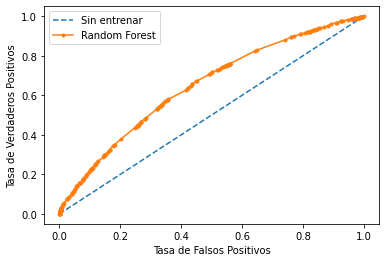

In [494]:
ns_probs= [0 for _ in range(len(y_test))]
lr_probs1=clf3.predict_proba(X_test)
lr_probs=lr_probs1[:, 1]


ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

In [495]:
print("--Train--")
evaluate_model(y_train,train_pred)
print("--Test--")
evaluate_model(y_test,test_pred)

--Train--
Matrix Confusion 
 [[6291 3231]
 [4106 5416]]
Accuracy : 0.6147342995169082
Recall : 0.5687880697332494
Precision : 0.6263443969006592
F1 Score : 0.5961803071165173
--Test--
Matrix Confusion 
 [[6021 3045]
 [1823 2251]]
Accuracy : 0.6295281582952816
Recall : 0.5525282277859598
Precision : 0.42503776435045315
F1 Score : 0.4804695837780149


Cuarto Modelo

para la contruccion de este modelo se va tomar el modelo XGBoost sin parametros y se realiza un balanceo en la distribucion de la variable de atrasos en la base de entrenamiento para que quede 50%-50% y para la base de validacion se propone hacer un cambio en la distribucion de la variable respuesta de 70%-30%

In [496]:
clf4=XGBClassifier()
clf4.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [497]:
train_pred = clf4.predict(X_train)
test_pred = clf4.predict(X_test)

Sin entrenar: ROC AUC=0.500
XGBClasifier: ROC AUC=0.648


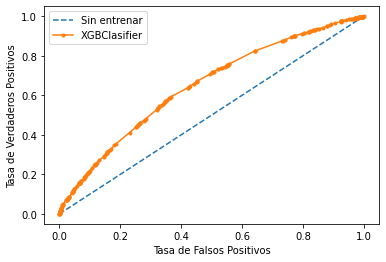

In [498]:
ns_probs= [0 for _ in range(len(y_test))]
lr_probs1=clf4.predict_proba(X_test)
lr_probs=lr_probs1[:, 1]


ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('XGBClasifier: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBClasifier')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

In [499]:
print("--Train--")
evaluate_model(y_train,train_pred)
print("--Test--")
evaluate_model(y_test,test_pred)

--Train--
Matrix Confusion 
 [[6150 3372]
 [3965 5557]]
Accuracy : 0.6147342995169082
Recall : 0.5835958832178114
Precision : 0.622354127001904
F1 Score : 0.6023521760338193
--Test--
Matrix Confusion 
 [[5920 3146]
 [1773 2301]]
Accuracy : 0.6256468797564688
Recall : 0.56480117820324
Precision : 0.4224343675417661
F1 Score : 0.48335258901375905


Quinto Modelo

para la contruccion de este modelo se va tomar el modelo randomforest donde por medio de la metologia de GridSearchv se va a encontrar el mejor estimador del modelo y se realiza un balanceo en la distribucion de la variable de atrasos en la base de entrenamiento para que quede 50%-50% y para la base de validacion se propone hacer un cambio en la distribucion de la variable respuesta de 70%-30%

In [500]:
from sklearn.model_selection import GridSearchCV

In [501]:
max_depth=[20,35,45]
max_features=['sqrt', 'auto']
n_estimators=[150,180,200,250]

tuned_parameters= {'max_depth': max_depth,
                   'max_features': max_features,
                   'n_estimators': n_estimators}
radm_clf=RandomForestClassifier()

clf5= GridSearchCV(radm_clf,tuned_parameters,cv=5, scoring='roc_auc')
clf5.fit(X_train,y_train)

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\Users\Usu

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 35, 45],
                         'max_features': ['sqrt', 'auto'],
                         'n_estimators': [150, 180, 200, 250]},
             scoring='roc_auc')

In [502]:
clf5.best_estimator_

RandomForestClassifier(max_depth=45, max_features='sqrt', n_estimators=250)

In [503]:
clf5=RandomForestClassifier(max_depth=45, max_features='sqrt', n_estimators=250)
clf5.fit(X_train,y_train)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3128\2981551189.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf5.fit(X_train,y_train)


RandomForestClassifier(max_depth=45, max_features='sqrt', n_estimators=250)

In [504]:
train_pred = clf5.predict(X_train)
test_pred = clf5.predict(X_test)

Sin entrenar: ROC AUC=0.500
Random Forest: ROC AUC=0.648


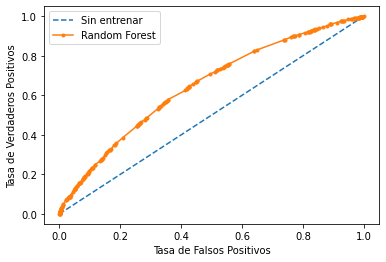

In [505]:
ns_probs= [0 for _ in range(len(y_test))]
lr_probs1=clf5.predict_proba(X_test)
lr_probs=lr_probs1[:, 1]


ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

In [506]:
print("--Train--")
evaluate_model(y_train,train_pred)
print("--Test--")
evaluate_model(y_test,test_pred)

--Train--
Matrix Confusion 
 [[6186 3336]
 [3999 5523]]
Accuracy : 0.6148393194706995
Recall : 0.5800252047889098
Precision : 0.6234337961395191
F1 Score : 0.6009466296719438
--Test--
Matrix Confusion 
 [[5941 3125]
 [1781 2293]]
Accuracy : 0.6266362252663622
Recall : 0.5628375061364752
Precision : 0.42321889996308604
F1 Score : 0.4831436999578593


Sexto Modelo

para la contruccion de este modelo se va tomar el modelo XGBoost donde por medio de la metologia de GridSearchv se va a encontrar el mejor estimador del modelo y se realiza un balanceo en la distribucion de la variable de atrasos en la base de entrenamiento para que quede 50%-50% y para la base de validacion se propone hacer un cambio en la distribucion de la variable respuesta de 70%-30%

In [507]:
XGB= XGBClassifier(n_jobs=-1)
param_grid = {
    'colsample_bytree' : np.linspace(0.6,0.8,2),
    'n_estimators': [50,100],
    'max_depth': [5,6]}

CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv=3)

In [508]:
CV_XGB.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

In [509]:
best_xgb_model = CV_XGB.best_estimator_
train_pred = best_xgb_model.predict(X_train)
test_pred = best_xgb_model.predict(X_test)

In [510]:
print("--Train--")
evaluate_model(y_train,train_pred)
print("--Test--")
evaluate_model(y_test,test_pred)

--Train--
Matrix Confusion 
 [[6102 3420]
 [3925 5597]]
Accuracy : 0.6143142197017434
Recall : 0.5877966813694602
Precision : 0.6207164245314406
F1 Score : 0.6038081881439128
--Test--
Matrix Confusion 
 [[5897 3169]
 [1744 2330]]
Accuracy : 0.626103500761035
Recall : 0.5719194894452626
Precision : 0.4237134024368067
F1 Score : 0.486785751593022


Para tomar la decision final de cual modelo escoger, se tiene en cuenta las siguientes metricas de evaluacion: ROC AUC,Accuracy, Recall, Precision y F1 Score; estas metricas ayudan a medir el grado de coincidencia de los valores predichos con respecto a los valores reales.

Despues de analizar los 6 modelos construidos se puede concluir que el modelo 6 es mucho mejor que los otros modelos ya que en conjunto sus metricas son levemente mas altas. 

Variables mas Influyentes en la prediccion:

In [513]:
X_train_2=train.loc[:,["temporada_alta", 7.0, 10.0, 12.0,"I","tarde","Latin American Wings","Buenos Aires","Sao Paulo",3.0,4.0,"N",
                "mañana","Copa Air","Antofagasta","Calama"]]

In [515]:
feature_rank=pd.DataFrame({'feature': X_train_2.columns, 'importance': best_xgb_model.feature_importances_ })
feature_rank_1=feature_rank.loc[:,'importance'] >=0.01
feature_rank_f=feature_rank.loc[feature_rank_1]
feature_rank_f.head(15)

,feature,importance
0,temporada_alta,0.011447
1,7.0,0.059072
2,10.0,0.043865
3,12.0,0.047086
4,I,0.017616
5,tarde,0.026035
6,Latin American Wings,0.076613
7,Buenos Aires,0.037918
8,Sao Paulo,0.025012
9,3.0,0.063750


Se puede concluir que las variables mas importantes que afectan en el atraso de los vuelos son:

1. Si se realiza un vuelo nacional
2. Si pertenece a la Aerolinea Copa Air
3. Si pertenece a la Aerolinea Latin American Wings
4. Si el vuelo se realiza en el mes de Marzo
5. Si el vuelo se realiza en el mes de Julio

Si se tiene en cuenta estas variables dentro de los vuelos y se actua con anticipacion se puede disminuir la tasa de retrasos de vuelos. Adicionalmente si se aplica el modelo de probabilidad de atrasos de vuelos a los proximos vuelos que se vayan a realizar y aquellos que tengan una probabilidad alta se puede generar diferentes estrategias con anticipacion para mejorar los tiempos de despegue de los vuelos.  

Trabajos Futuros:

Con el fin de mejorar el performance del modelo se puede proponer realizar un SMOTE para el balanceo de los datos con respecto a la variable respuesta. Como segunda opcion tambien se puede realizar metodos de ensamble (Baggin y Boosting) y finalmente se puede utilizar otros modelos supervisados como support vector machine classifier o el Light GBM.